C:\Users\macla\AppData\Local\Temp\ipykernel_21904\1576437960.py:16: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  throughput_resampled = df['throughput_mbps'].resample('1S').sum().fillna(0)
C:\Users\macla\AppData\Local\Temp\ipykernel_21904\1576437960.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\macla\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


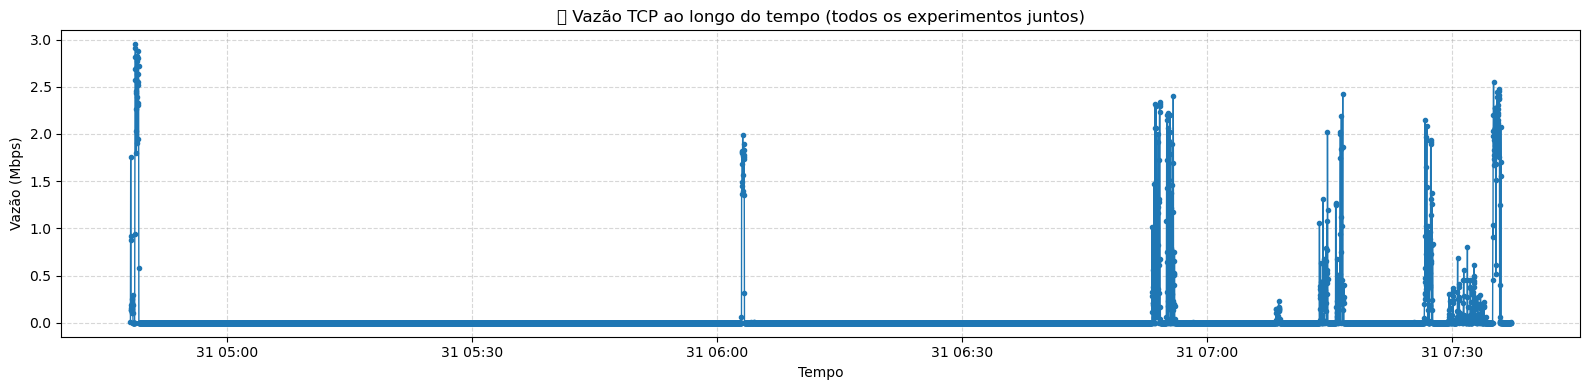

In [7]:
# 📌 1. Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 2. Carregar o CSV
df = pd.read_csv('resultado_geral.csv')

# 📅 3. Converter timestamp para datetime
df['datetime'] = pd.to_datetime(df['ts_rounded'], unit='s')

# 🧹 4. Organizar e setar índice
df = df.sort_values('datetime')
df.set_index('datetime', inplace=True)

# 📊 5. Reamostrar geral (para visualização total)
throughput_resampled = df['throughput_mbps'].resample('1S').sum().fillna(0)

# 🎨 6. Plotar gráfico geral
plt.figure(figsize=(16, 4))
plt.plot(throughput_resampled.index, throughput_resampled.values, marker='o', markersize=3, linewidth=1)
plt.title('📈 Vazão TCP ao longo do tempo (todos os experimentos juntos)')
plt.xlabel('Tempo')
plt.ylabel('Vazão (Mbps)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\macla\AppData\Local\Temp\ipykernel_21904\3256312352.py:6: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  exp_resampled = df_exp['throughput_mbps'].resample('1S').sum().fillna(0)
C:\Users\macla\AppData\Local\Temp\ipykernel_21904\3256312352.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\macla\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


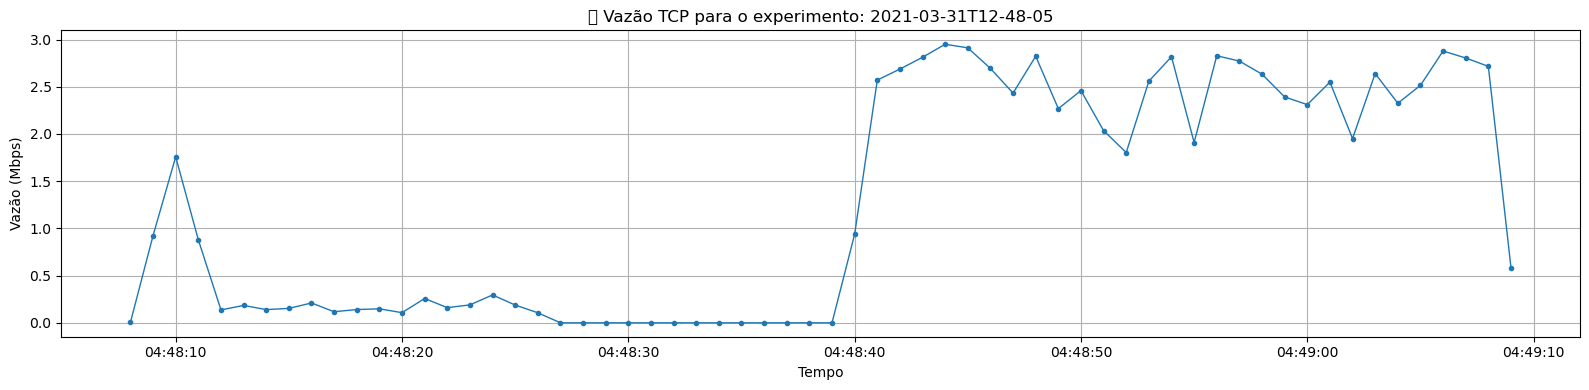

In [8]:
# 🔍 7. Filtrar por um experimento específico
experimento_foco = '2021-03-31T12-48-05'  # Altere conforme necessário
df_exp = df[df['experimento'] == experimento_foco]

# Reamostragem
exp_resampled = df_exp['throughput_mbps'].resample('1S').sum().fillna(0)

plt.figure(figsize=(16, 4))
plt.plot(exp_resampled.index, exp_resampled.values, marker='o', markersize=3, linewidth=1)
plt.title(f'🔍 Vazão TCP para o experimento: {experimento_foco}')
plt.xlabel('Tempo')
plt.ylabel('Vazão (Mbps)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\macla\AppData\Local\Temp\ipykernel_21904\2186346682.py:13: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\macla\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


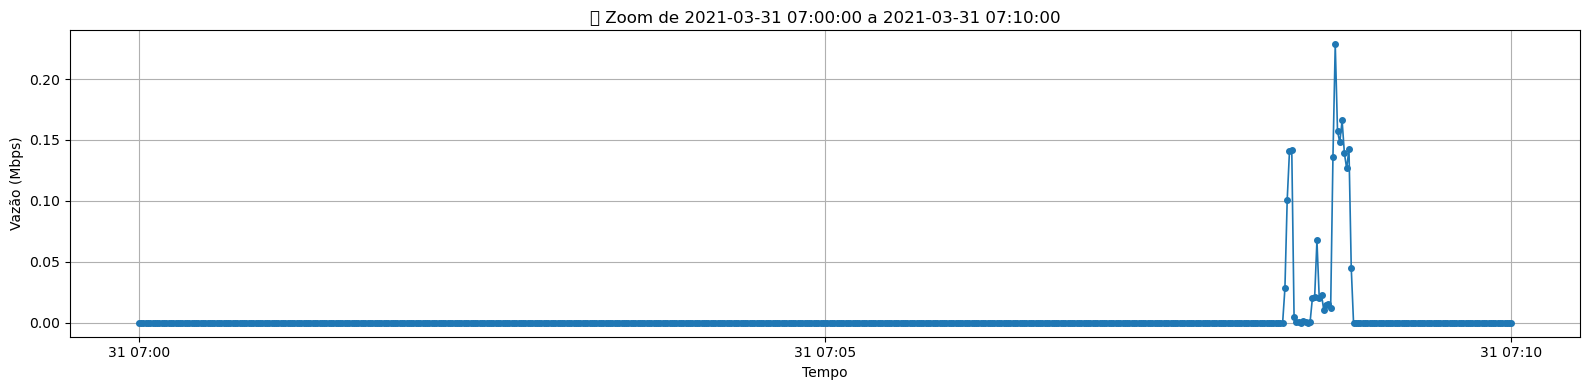

In [9]:
# 🔍 8. Zoom manual por intervalo de tempo
inicio = '2021-03-31 07:00:00'
fim = '2021-03-31 07:10:00'

zoom_df = throughput_resampled.loc[inicio:fim]

plt.figure(figsize=(16, 4))
plt.plot(zoom_df.index, zoom_df.values, marker='o', markersize=4, linewidth=1.2)
plt.title(f'🔎 Zoom de {inicio} a {fim}')
plt.xlabel('Tempo')
plt.ylabel('Vazão (Mbps)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\macla\AppData\Local\Temp\ipykernel_21904\3173318656.py:6: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  throughput_exp = df_exp['throughput_mbps'].resample('1S').sum().fillna(0)
C:\Users\macla\AppData\Local\Temp\ipykernel_21904\3173318656.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\macla\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


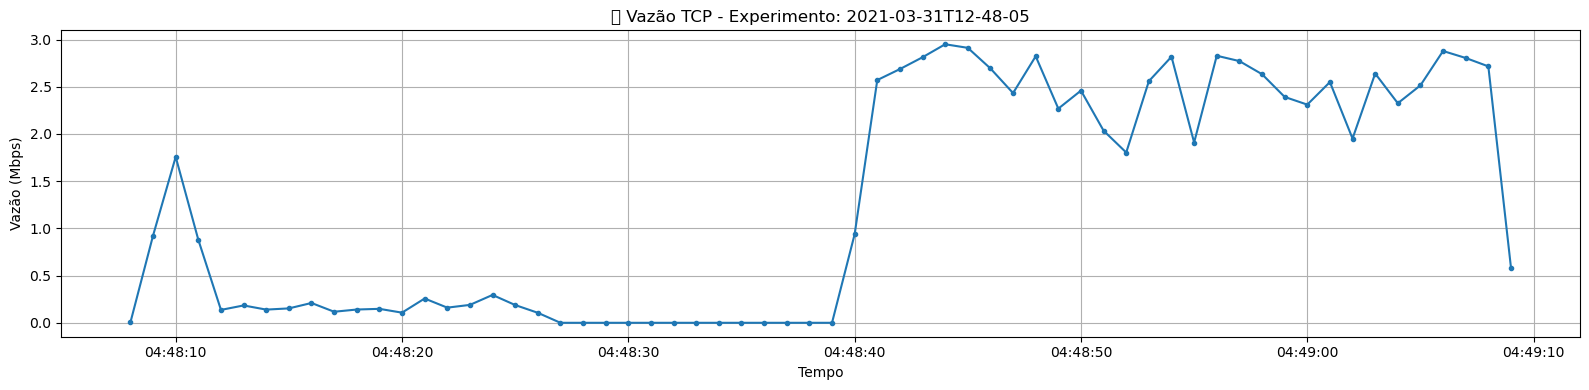

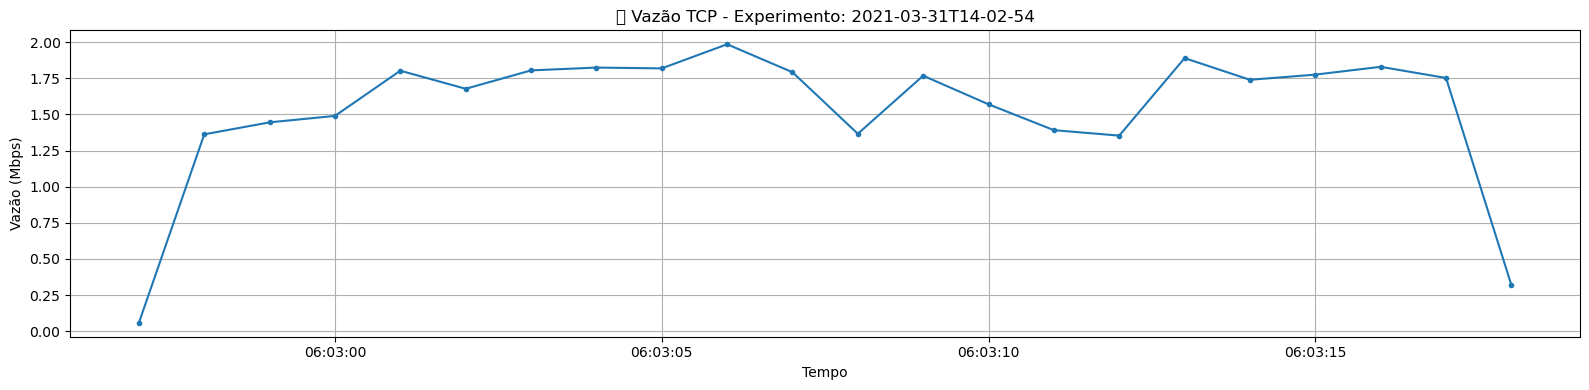

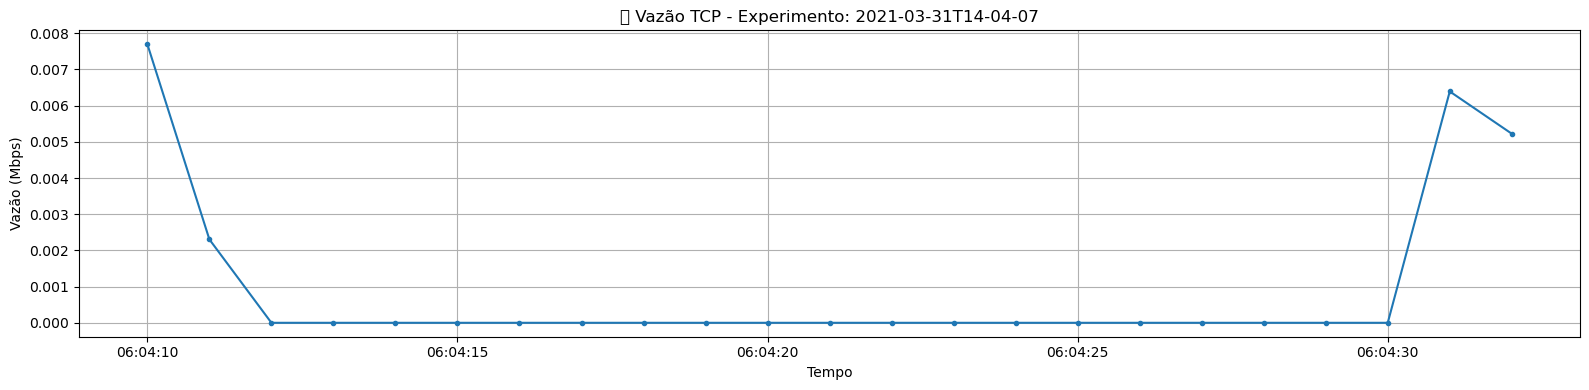

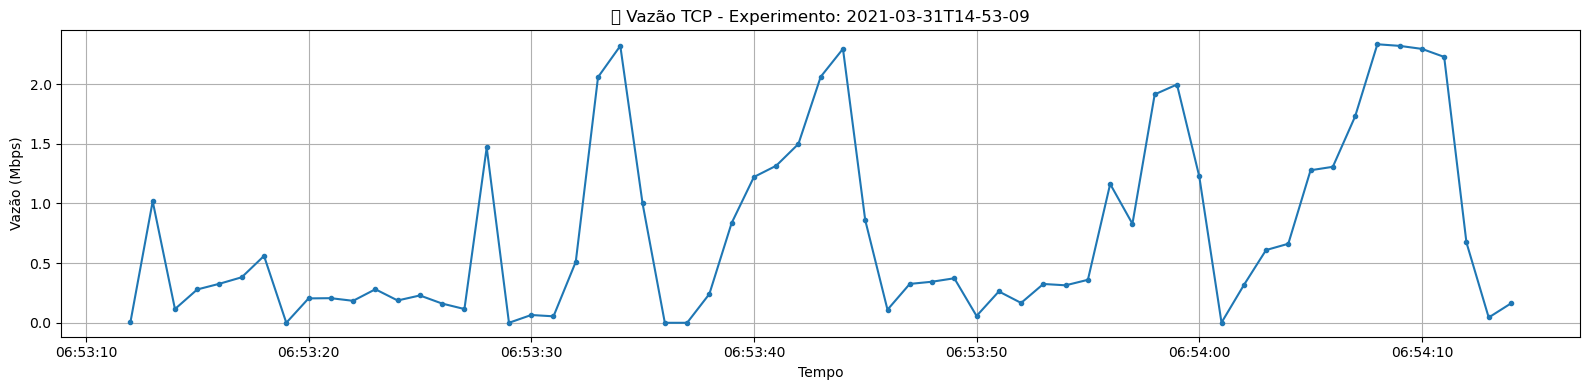

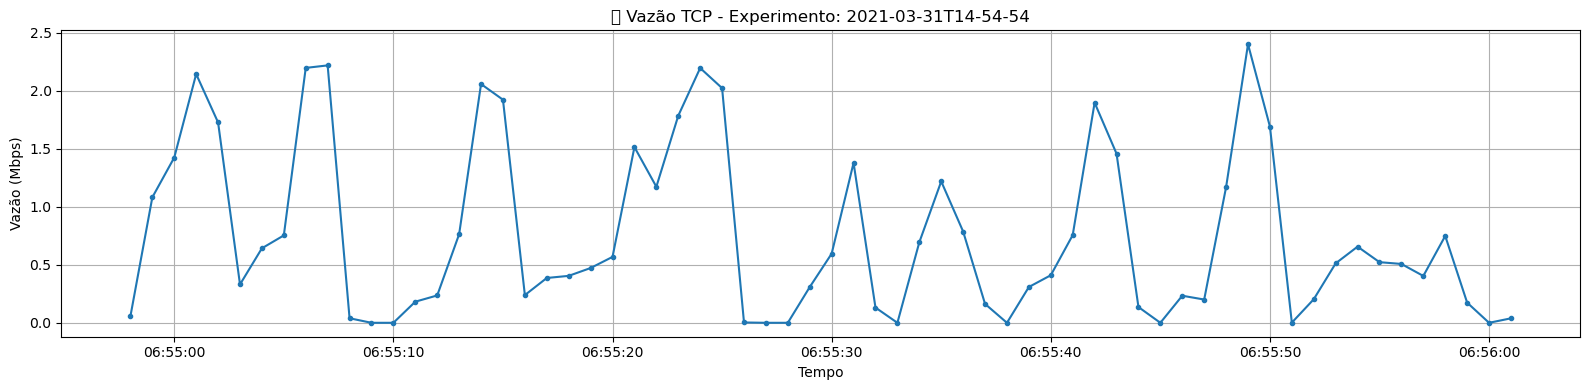

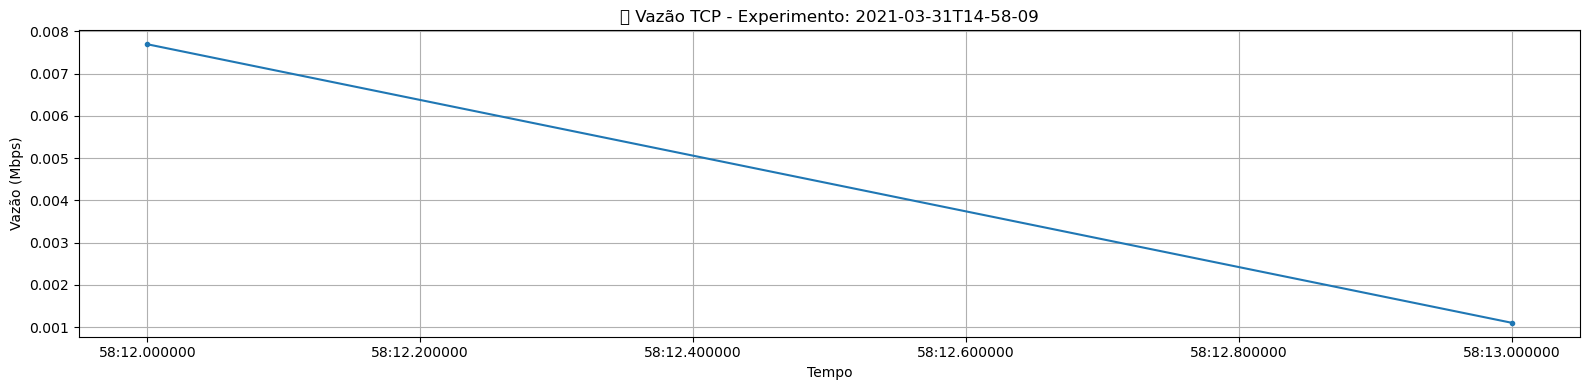

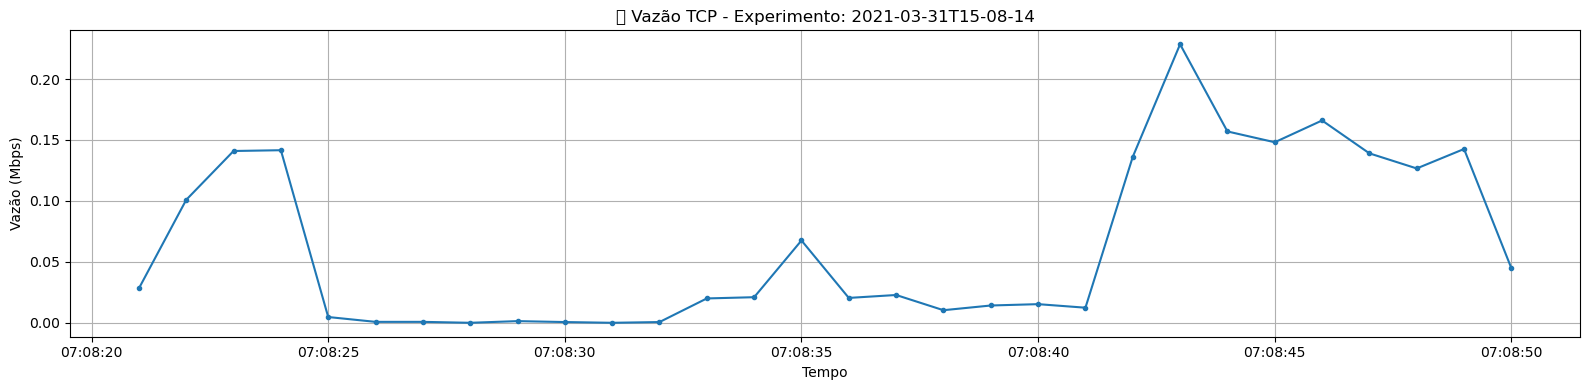

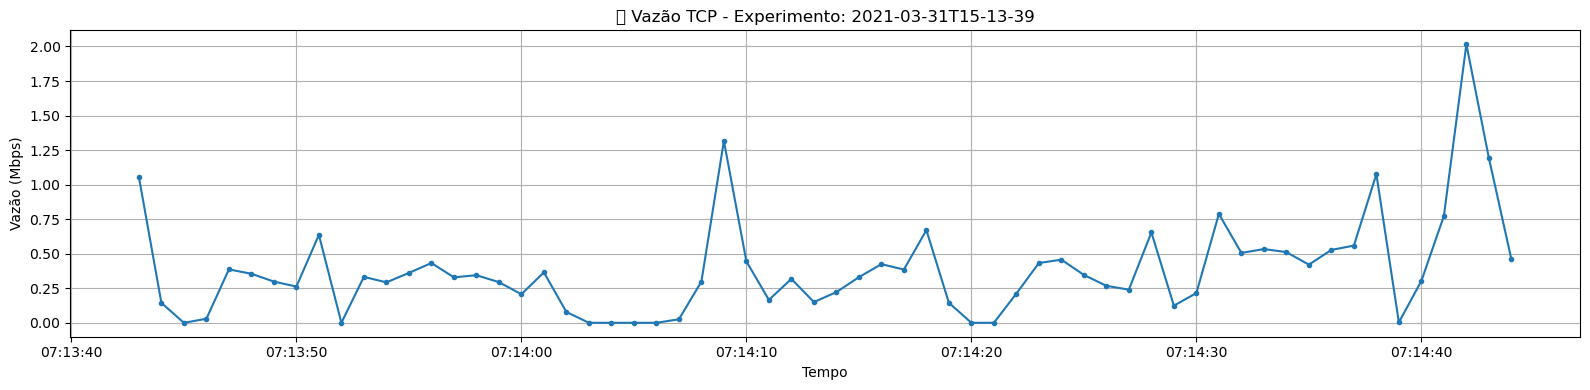

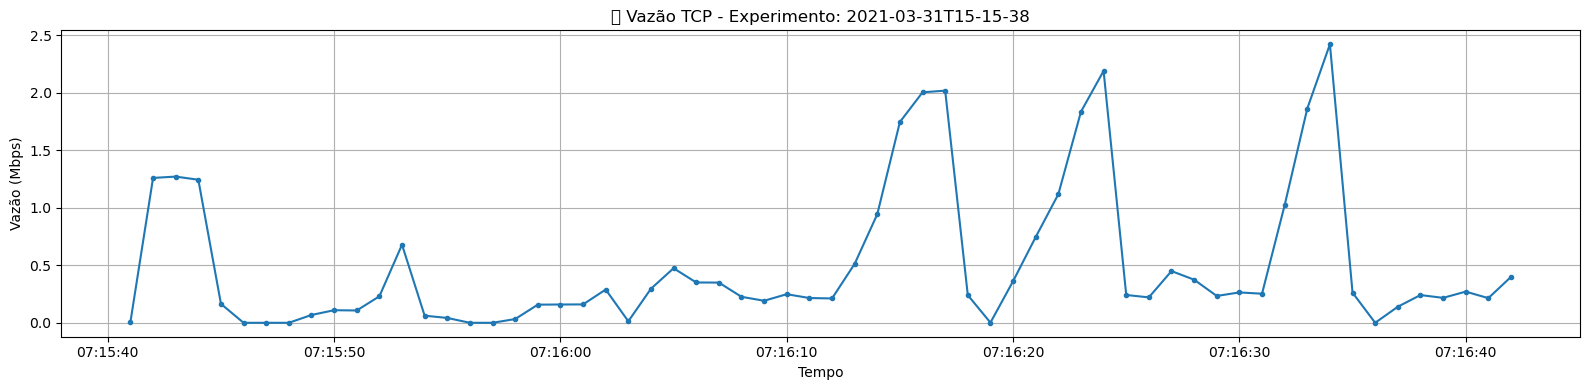

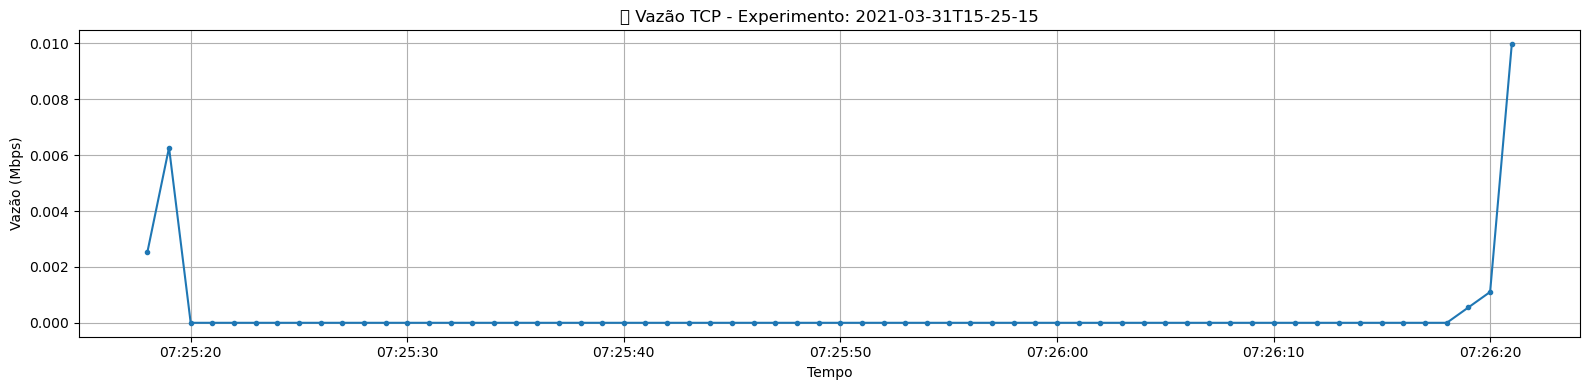

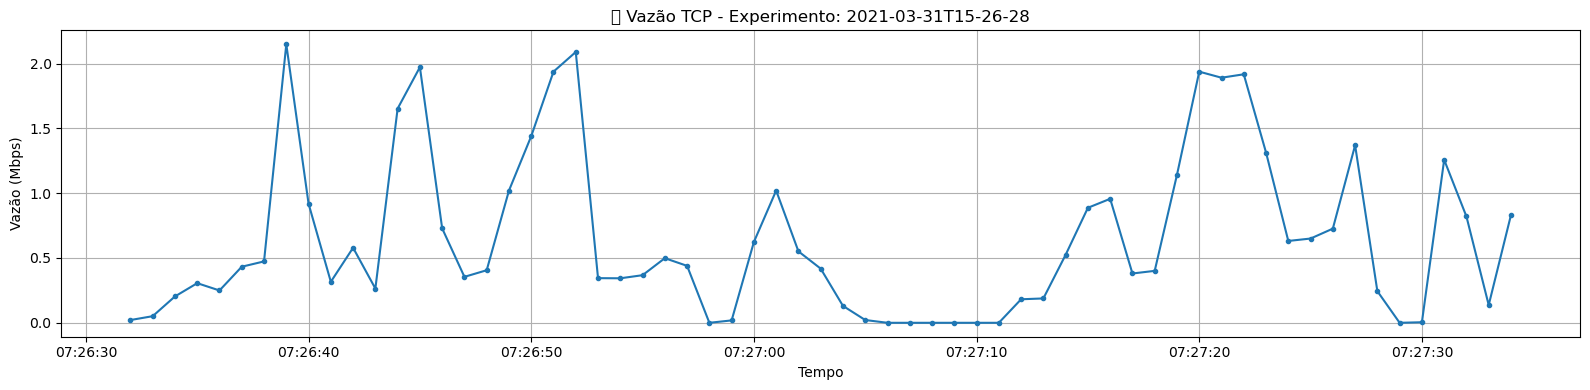

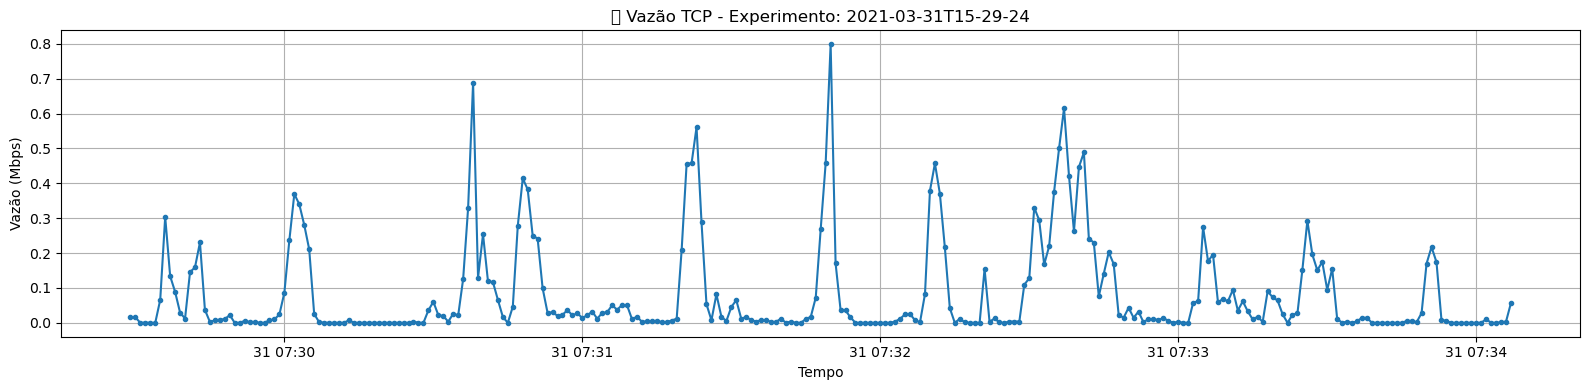

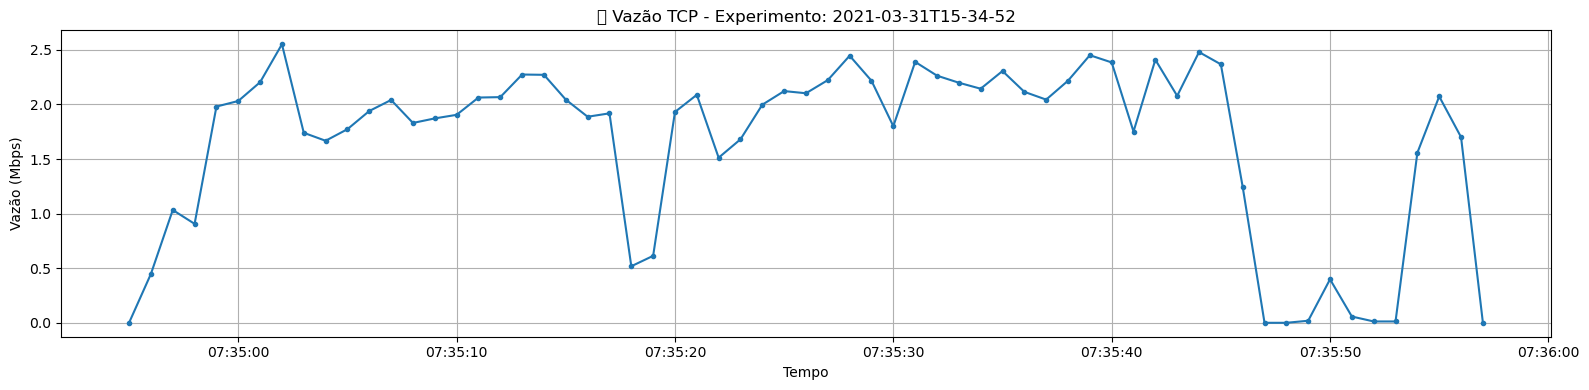

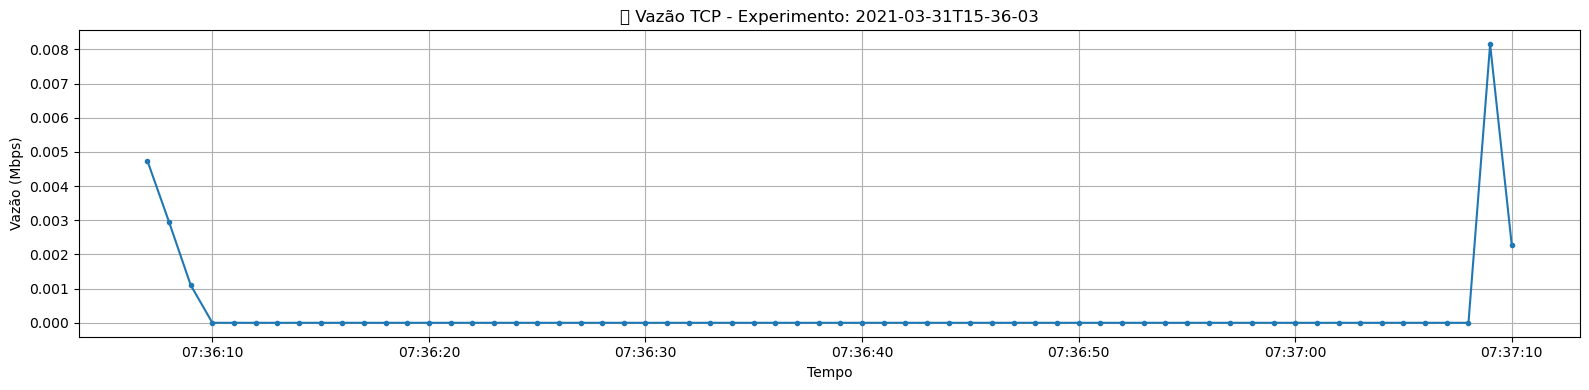

In [10]:
# 🔁 9. Loop por todos os experimentos individualmente
experimentos_unicos = df['experimento'].unique()

for exp in experimentos_unicos:
    df_exp = df[df['experimento'] == exp]
    throughput_exp = df_exp['throughput_mbps'].resample('1S').sum().fillna(0)

    plt.figure(figsize=(16, 4))
    plt.plot(throughput_exp.index, throughput_exp.values, marker='o', markersize=3)
    plt.title(f'📊 Vazão TCP - Experimento: {exp}')
    plt.xlabel('Tempo')
    plt.ylabel('Vazão (Mbps)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [11]:
import pandas as pd

# Carrega CSV e converte timestamps
df = pd.read_csv('resultado_geral.csv')
df['datetime'] = pd.to_datetime(df['ts_rounded'], unit='s')
df = df.sort_values('datetime')
df.set_index('datetime', inplace=True)

# Agrupa por experimento e reamostra com frequência fixa
experimentos = df['experimento'].unique()
resampled_data = {}

for exp in experimentos:
    df_exp = df[df['experimento'] == exp]
    ts = df_exp['throughput_mbps'].resample('1S').sum().fillna(0)
    resampled_data[exp] = ts


C:\Users\macla\AppData\Local\Temp\ipykernel_21904\1667264991.py:15: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  ts = df_exp['throughput_mbps'].resample('1S').sum().fillna(0)


In [12]:
def extrair_trechos_continuos(serie, janela_minima=60, tolerancia_zero=3):
    """
    Retorna trechos contínuos de uma série com duração ≥ janela_minima e poucos zeros seguidos.
    """
    trechos = []
    buffer = []
    for i in range(len(serie)):
        val = serie.iloc[i]
        buffer.append(val)
        if len(buffer) >= janela_minima:
            segmento = pd.Series(buffer[-janela_minima:], index=serie.index[i - janela_minima + 1:i + 1])
            # tolerância: até X segundos seguidos de 0 permitido
            if segmento.rolling(tolerancia_zero).sum().min() > 0:
                trechos.append(segmento)
    return trechos


In [13]:
import numpy as np

def criar_janelas(trecho, input_size=10, horizon=1):
    X, y = [], []
    for i in range(len(trecho) - input_size - horizon + 1):
        X.append(trecho.iloc[i:i+input_size].values)
        y.append(trecho.iloc[i+input_size+horizon-1])
    return X, y


In [14]:
input_size = 10  # tamanho da sequência
horizon = 1      # previsão de 1 passo à frente

X_total, y_total = [], []

for exp, serie in resampled_data.items():
    trechos = extrair_trechos_continuos(serie)
    for trecho in trechos:
        X, y = criar_janelas(trecho, input_size, horizon)
        X_total.extend(X)
        y_total.extend(y)

X_np = np.array(X_total)
y_np = np.array(y_total)

print(f'✅ Formato final: X = {X_np.shape}, y = {y_np.shape}')


✅ Formato final: X = (3500, 10), y = (3500,)


C:\Users\macla\AppData\Local\Temp\ipykernel_21904\3536250606.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\macla\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


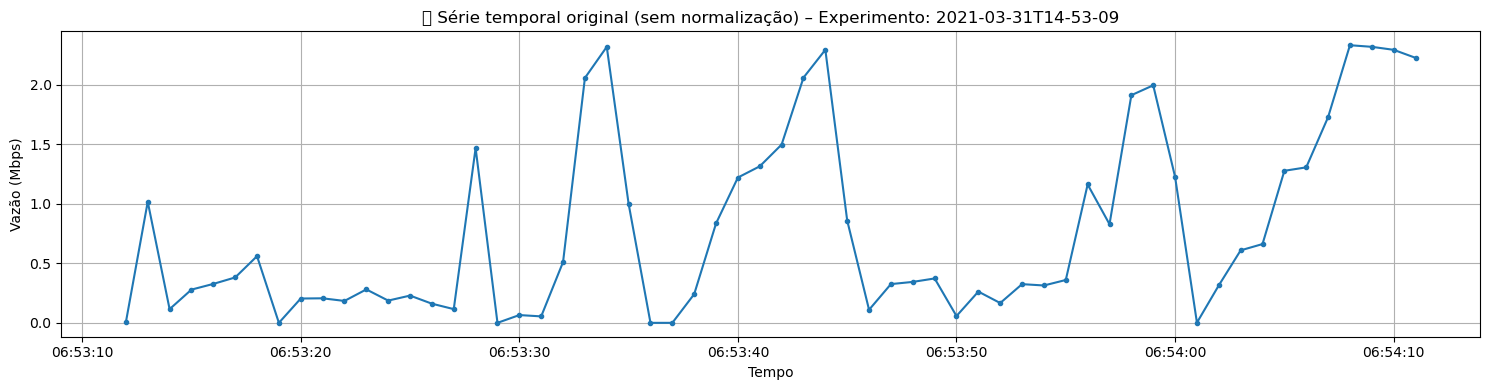

In [15]:
import matplotlib.pyplot as plt

# 🔍 Vamos usar o primeiro trecho contínuo encontrado como exemplo
if resampled_data:
    for exp, serie in resampled_data.items():
        trechos = extrair_trechos_continuos(serie)
        if trechos:
            trecho_exemplo = trechos[0]
            break  # já temos um trecho

    # 📈 Plotar a série temporal original
    plt.figure(figsize=(15, 4))
    plt.plot(trecho_exemplo.index, trecho_exemplo.values, marker='o', markersize=3)
    plt.title(f'📊 Série temporal original (sem normalização) – Experimento: {exp}')
    plt.xlabel('Tempo')
    plt.ylabel('Vazão (Mbps)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("❌ Nenhum trecho válido encontrado para plotagem.")
